In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# FOREST FIRES

### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [3]:
data=pd.read_csv('forestfires.csv')
print(data.shape)
data.head(5)

(517, 31)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [7]:
data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [8]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [16]:
data['area'].value_counts()

0.00     247
1.94       3
28.66      2
0.52       2
9.96       2
        ... 
2.21       1
7.36       1
0.24       1
6.84       1
35.88      1
Name: area, Length: 251, dtype: int64

## Visualization for Categorical Variables

In [6]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

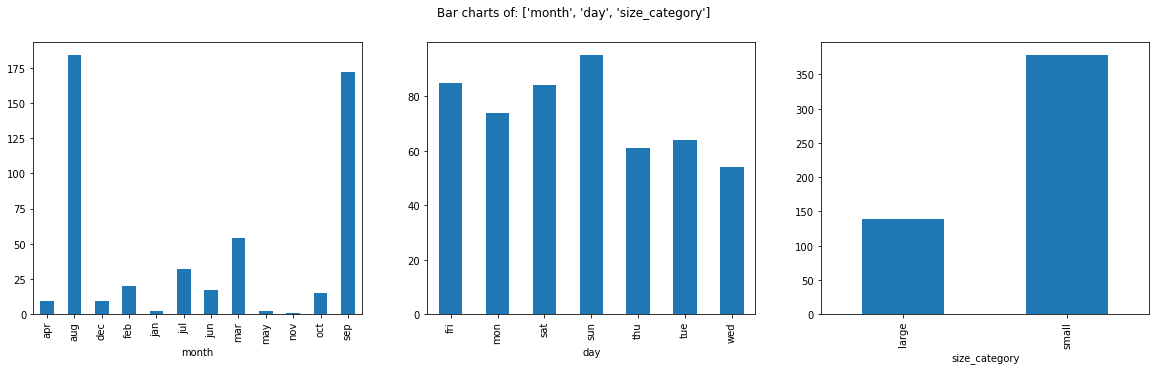

In [7]:
PlotBarCharts(inpData=data, 
              colsToPlot=['month', 'day', 'size_category'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ABACDC1C0>,
      dtype=object)

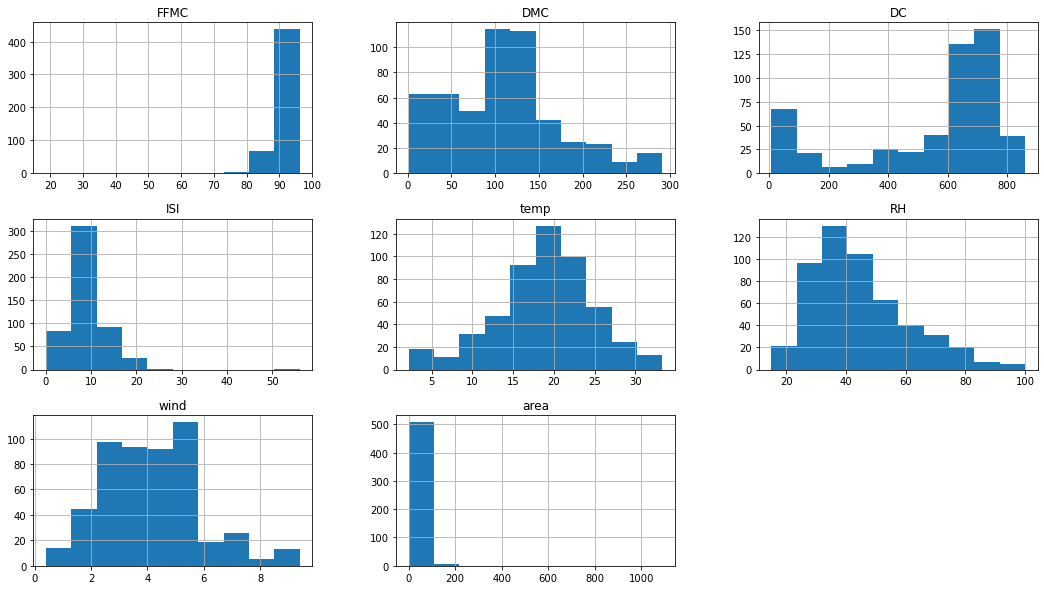

In [8]:
data.hist(['FFMC', 'DMC','DC','ISI','temp','RH','wind','area'], figsize=(18,10))

In [26]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## Visualisation for Continuous Variables

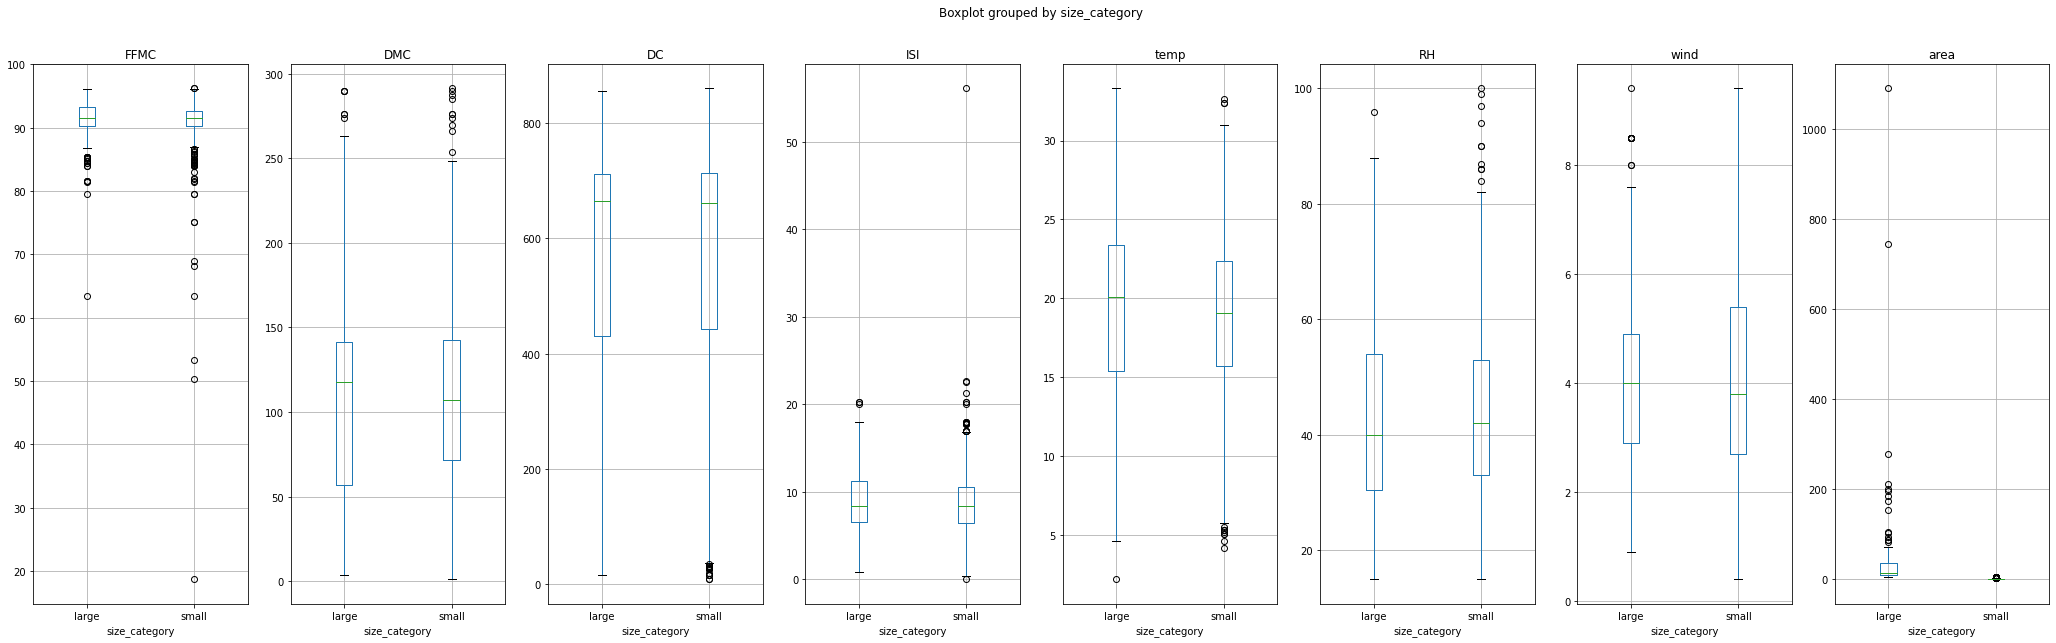

In [10]:
ContinuousColsList=['FFMC', 'DMC','DC','ISI','temp','RH','wind','area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(35,10))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='size_category', figsize=(7,10), vert=True, ax=PlotCanvas[i])

## Finding Correlation using ANOVA

In [11]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [19]:
ContinuousVariables=['FFMC', 'DMC','DC','ISI','temp','RH','wind','area','rain','daysun','daymon','daytue','daywed','daythu','dayfri','daysat','monthjan','monthfeb','monthmar','monthapr','monthmay','monthjun','monthjul','monthaug','monthsep','monthoct','monthnov','monthdec']
FunctionAnova(inpData=data, TargetVariable='size_category', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

FFMC is NOT correlated with size_category | P-Value: 0.6167234815885696
DMC is NOT correlated with size_category | P-Value: 0.43089775066791625
DC is NOT correlated with size_category | P-Value: 0.6594187401058078
ISI is NOT correlated with size_category | P-Value: 0.843093421670368
temp is NOT correlated with size_category | P-Value: 0.8913758799079773
RH is NOT correlated with size_category | P-Value: 0.30453192297179027
wind is NOT correlated with size_category | P-Value: 0.1795900186866762
area is correlated with size_category | P-Value: 4.410263966331799e-13
rain is NOT correlated with size_category | P-Value: 0.2564326388579949
daysun is NOT correlated with size_category | P-Value: 0.7093955436584418
daymon is NOT correlated with size_category | P-Value: 0.8002251028828613
daytue is NOT correlated with size_category | P-Value: 0.40119353334591357
daywed is NOT correlated with size_category | P-Value: 0.6231935127019356
daythu is NOT correlated with siz

['area', 'monthdec']

In [14]:
CrossTabResult=pd.crosstab(index=data['rain'], columns=data['area'])
CrossTabResult

area,0.00,0.09,0.17,0.21,0.24,0.33,0.36,0.41,0.43,0.47,...,105.66,154.88,174.63,185.76,196.48,200.94,212.88,278.53,746.28,1090.84
rain,,,,,,,,,,,,,,,,,,,,,
0.0,241,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
0.2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.8,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
CrossTabResult=pd.crosstab(index=data['month'], columns=data['area'])
CrossTabResult

area,0.00,0.09,0.17,0.21,0.24,0.33,0.36,0.41,0.43,0.47,...,105.66,154.88,174.63,185.76,196.48,200.94,212.88,278.53,746.28,1090.84
month,,,,,,,,,,,,,,,,,,,,,
apr,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aug,85,1,1,1,1,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,0
dec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feb,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jan,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jul,14,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
jun,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mar,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
may,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
CrossTabResult=pd.crosstab(index=data['day'], columns=data['area'])
CrossTabResult

area,0.00,0.09,0.17,0.21,0.24,0.33,0.36,0.41,0.43,0.47,...,105.66,154.88,174.63,185.76,196.48,200.94,212.88,278.53,746.28,1090.84
day,,,,,,,,,,,,,,,,,,,,,
fri,42,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
mon,35,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
sat,42,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
sun,48,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
thu,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
tue,28,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
wed,22,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
CrossTabResult=pd.crosstab(index=data['size_category'], columns=data['area'])
CrossTabResult

area,0.00,0.09,0.17,0.21,0.24,0.33,0.36,0.41,0.43,0.47,...,105.66,154.88,174.63,185.76,196.48,200.94,212.88,278.53,746.28,1090.84
size_category,,,,,,,,,,,,,,,,,,,,,
large,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
small,247,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0


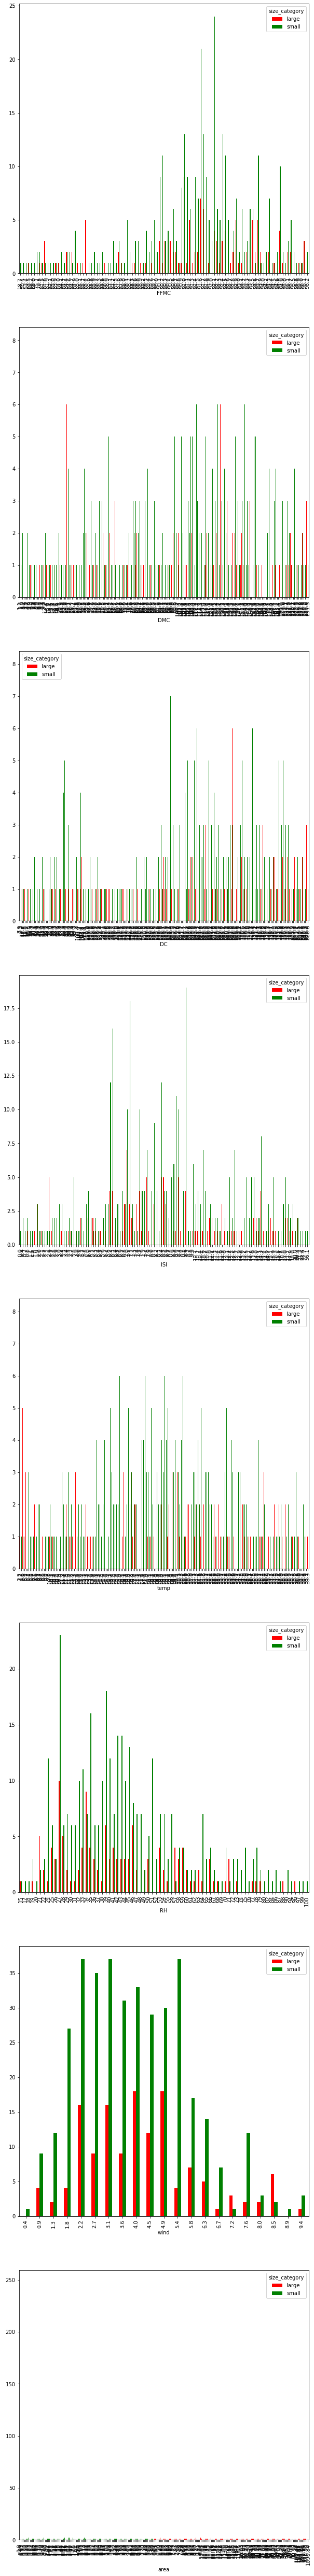

In [21]:
ColsList=['FFMC', 'DMC','DC','ISI','temp','RH','wind','area']
CategoricalCol = ['month', 'day']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(ColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(ColsList, range(len(ColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['size_category'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

## Encoding the Category Columns

In [9]:
data['size_category'].replace({'small':1, 'large':0}, inplace=True)
data['month'].replace({'jan':1, 'feb':2,'mar':3, 'apr':4,'may':5, 'jun':6,'jul':7, 'aug':8,'sep':9, 'oct':10,'nov':11, 'dec':12}, inplace=True)
data['day'].replace({'sun':1, 'mon':2,'tue':3,'wed':4, 'thu':5,'fri':6, 'sat':7}, inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


## Defining X and Y

In [17]:
X = data.drop('size_category',axis=1)
y = data['size_category']

In [18]:
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int64

## Splitting data to training and testing dataset

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Standarization of data

In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wrapt-1.12.1-cp38-cp38-win_amd64.whl
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling w

In [18]:
!pip install keras

## Oversampling Count

In [75]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_os,y_train_os=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 263, 0: 98})
The number of classes after fit Counter({1: 122, 0: 98})


## Undersampling Count

In [76]:
from imblearn.over_sampling import RandomOverSampler
us=RandomOverSampler(0.75)
X_train_us,y_train_us=us.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_us)))

The number of classes before fit Counter({1: 263, 0: 98})
The number of classes after fit Counter({1: 263, 0: 197})


In [77]:
from numpy.random import seed
import tensorflow 
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout

In [78]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

## Model Creation

In [79]:
model = create_model()
print(model.summary())

Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_298 (Dense)            (None, 8)                 248       
_________________________________________________________________
dropout_139 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None


## Training The Model

In [80]:
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
value_acc = np.mean(training.history['accuracy'])
print("\n%s: %.2f%%" % ('val_acc', value_acc*100))


val_acc: 77.75%


In [81]:
test = model.fit(X_test, y_test, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
test_acc = np.mean(test.history['accuracy'])
print("\n%s: %.2f%%" % ('test_acc', test_acc*100))


test_acc: 87.25%


In [82]:
training_df = pd.DataFrame(training.history)
print(training_df)

        loss  accuracy  val_loss  val_accuracy
0   1.083385  0.527778  1.001172      0.493151
1   1.013626  0.548611  0.940749      0.479452
2   0.951446  0.565972  0.888373      0.479452
3   0.894717  0.576389  0.845427      0.479452
4   0.849120  0.576389  0.805658      0.520548
..       ...       ...       ...           ...
95  0.390035  0.822917  0.514742      0.767123
96  0.388528  0.826389  0.515675      0.767123
97  0.387798  0.829861  0.515515      0.780822
98  0.386525  0.833333  0.513449      0.780822
99  0.385904  0.833333  0.512611      0.780822

[100 rows x 4 columns]


In [83]:
test_df = pd.DataFrame(test.history)
print(test_df)

        loss  accuracy  val_loss  val_accuracy
0   0.515204  0.822581  0.533246        0.8125
1   0.505375  0.822581  0.528292        0.8125
2   0.488224  0.822581  0.523093        0.8125
3   0.474059  0.822581  0.517297        0.8125
4   0.456357  0.822581  0.511489        0.8125
..       ...       ...       ...           ...
95  0.242258  0.895161  0.365304        0.8750
96  0.241555  0.895161  0.364731        0.8750
97  0.240844  0.895161  0.363816        0.8750
98  0.240533  0.895161  0.363601        0.8750
99  0.239629  0.895161  0.362861        0.8750

[100 rows x 4 columns]


## Plotting with the Accuracy Value

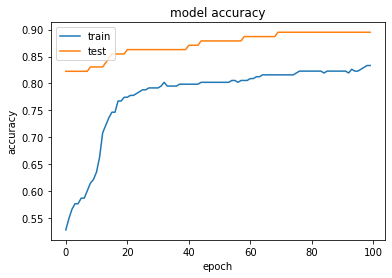

In [84]:
plt.plot(training.history['accuracy'])
plt.plot(test.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Grid Search

## batch size and epochs

In [85]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........................batch_size=16, epochs=50; total time=   1.0s
[CV] END ...........................batch_size=16, epochs=50; total time=   1.1s
[CV] END ...........................batch_size=16, epochs=50; total time=   1.1s
[CV] END ..........................batch_size=16, epochs=100; total time=   1.4s
[CV] END ..........................batch_size=16, epochs=100; total time=   2.0s
[CV] END ..........................batch_size=16, epochs=100; total time=   1.6s
[CV] END ...........................batch_size=32, epochs=50; total time=   1.4s
[CV] END ...........................batch_size=32, epochs=50; total time=   0.8s
[CV] END ...........................batch_size=32, epochs=50; total time=   0.8s
[CV] END ..........................batch_size=32, epochs=100; total time=   1.1s
[CV] END ..........................batch_size=32, epochs=100; total time=   1.1s
[CV] END ..........................batch_size=32,

In [86]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833792 using {'batch_size': 16, 'epochs': 100}
0.781129 (0.016135) with: {'batch_size': 16, 'epochs': 50}
0.833792 (0.027224) with: {'batch_size': 16, 'epochs': 100}
0.770041 (0.014762) with: {'batch_size': 32, 'epochs': 50}
0.794995 (0.027621) with: {'batch_size': 32, 'epochs': 100}
0.750689 (0.013643) with: {'batch_size': 64, 'epochs': 50}
0.775597 (0.012229) with: {'batch_size': 64, 'epochs': 100}


## Optimization Algorithm

In [87]:
%%time
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................opt=SGD; total time=   0.8s
[CV] END ............................................opt=SGD; total time=   0.8s
[CV] END ............................................opt=SGD; total time=   0.8s
[CV] END ............................................opt=SGD; total time=   0.8s
[CV] END ............................................opt=SGD; total time=   0.8s
[CV] END ........................................opt=RMSprop; total time=   1.2s
[CV] END ........................................opt=RMSprop; total time=   1.0s
[CV] END ........................................opt=RMSprop; total time=   1.0s
[CV] END ........................................opt=RMSprop; total time=   1.2s
[CV] END ........................................opt=RMSprop; total time=   1.0s


[CV] END ........................................opt=Adagrad; total time=   0.8s
[CV] END ........................................opt=Adagrad; total time=   1.0s
[CV] END ........................................opt=Adagrad; total time=   1.0s
[CV] END ........................................opt=Adagrad; total time=   1.2s
[CV] END ........................................opt=Adagrad; total time=   0.8s
[CV] END .......................................opt=Adadelta; total time=   0.7s
[CV] END .......................................opt=Adadelta; total time=   0.9s
[CV] END .......................................opt=Adadelta; total time=   0.8s
[CV] END .......................................opt=Adadelta; total time=   0.9s
[CV] END .......................................opt=Adadelta; total time=   0.9s


[CV] END ...........................................opt=Adam; total time=   0.8s
[CV] END ...........................................opt=Adam; total time=   0.9s
[CV] END ...........................................opt=Adam; total time=   1.3s
[CV] END ...........................................opt=Adam; total time=   1.0s
[CV] END ...........................................opt=Adam; total time=   0.9s
[CV] END ..........................................opt=Nadam; total time=   1.0s
[CV] END ..........................................opt=Nadam; total time=   1.2s
[CV] END ..........................................opt=Nadam; total time=   1.2s
[CV] END ..........................................opt=Nadam; total time=   1.2s
[CV] END ..........................................opt=Nadam; total time=   1.7s
Wall time: 33.8 s


In [88]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.781164 using {'opt': 'RMSprop'}
0.764612 (0.024067) with: {'opt': 'SGD'}
0.781164 (0.028294) with: {'opt': 'RMSprop'}
0.548402 (0.058499) with: {'opt': 'Adagrad'}
0.523440 (0.072291) with: {'opt': 'Adadelta'}
0.775609 (0.018557) with: {'opt': 'Adam'}
0.775609 (0.018557) with: {'opt': 'Nadam'}


## Hidden neurons

In [89]:
seed(42)
tensorflow.random.set_seed

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................................lyrs=[8]; total time=   0.9s
[CV] END ...........................................lyrs=[8]; total time=   1.0s
[CV] END ...........................................lyrs=[8]; total time=   0.9s
[CV] END ...........................................lyrs=[8]; total time=   0.9s
[CV] END ...........................................lyrs=[8]; total time=   0.9s
[CV] END ..........................................lyrs=[10]; total time=   0.8s
[CV] END ..........................................lyrs=[10]; total time=   0.9s
[CV] END ..........................................lyrs=[10]; total time=   1.3s
[CV] END ..........................................lyrs=[10]; total time=   0.9s
[CV] END ..........................................lyrs=[10]; total time=   0.9s


[CV] END .......................................lyrs=[10, 5]; total time=   0.8s
[CV] END .......................................lyrs=[10, 5]; total time=   1.0s
[CV] END .......................................lyrs=[10, 5]; total time=   1.1s
[CV] END .......................................lyrs=[10, 5]; total time=   1.1s
[CV] END .......................................lyrs=[10, 5]; total time=   1.0s
[CV] END .......................................lyrs=[12, 6]; total time=   0.8s
[CV] END .......................................lyrs=[12, 6]; total time=   1.4s
[CV] END .......................................lyrs=[12, 6]; total time=   1.0s
[CV] END .......................................lyrs=[12, 6]; total time=   0.9s
[CV] END .......................................lyrs=[12, 6]; total time=   1.0s


[CV] END ....................................lyrs=[12, 8, 4]; total time=   0.9s
[CV] END ....................................lyrs=[12, 8, 4]; total time=   1.0s
[CV] END ....................................lyrs=[12, 8, 4]; total time=   1.0s
[CV] END ....................................lyrs=[12, 8, 4]; total time=   1.0s
[CV] END ....................................lyrs=[12, 8, 4]; total time=   1.4s


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002C7F6E48910>, as the constructor either does not set or modifies parameter lyrs

In [90]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.781164 using {'opt': 'RMSprop'}
0.764612 (0.024067) with: {'opt': 'SGD'}
0.781164 (0.028294) with: {'opt': 'RMSprop'}
0.548402 (0.058499) with: {'opt': 'Adagrad'}
0.523440 (0.072291) with: {'opt': 'Adadelta'}
0.775609 (0.018557) with: {'opt': 'Adam'}
0.775609 (0.018557) with: {'opt': 'Nadam'}


## Dropout

In [91]:
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................dr=0.0; total time=   0.8s
[CV] END .............................................dr=0.0; total time=   0.9s
[CV] END .............................................dr=0.0; total time=   0.9s
[CV] END .............................................dr=0.0; total time=   1.0s
[CV] END .............................................dr=0.0; total time=   0.9s
[CV] END ............................................dr=0.01; total time=   0.8s
[CV] END ............................................dr=0.01; total time=   0.9s
[CV] END ............................................dr=0.01; total time=   0.9s
[CV] END ............................................dr=0.01; total time=   1.4s
[CV] END ............................................dr=0.01; total time=   0.9s


[CV] END ............................................dr=0.05; total time=   0.9s
[CV] END ............................................dr=0.05; total time=   1.0s
[CV] END ............................................dr=0.05; total time=   0.9s
[CV] END ............................................dr=0.05; total time=   0.9s
[CV] END ............................................dr=0.05; total time=   0.9s
[CV] END .............................................dr=0.1; total time=   0.9s
[CV] END .............................................dr=0.1; total time=   1.0s
[CV] END .............................................dr=0.1; total time=   1.5s
[CV] END .............................................dr=0.1; total time=   1.1s
[CV] END .............................................dr=0.1; total time=   1.0s


[CV] END .............................................dr=0.2; total time=   0.8s
[CV] END .............................................dr=0.2; total time=   0.9s
[CV] END .............................................dr=0.2; total time=   0.9s
[CV] END .............................................dr=0.2; total time=   0.9s
[CV] END .............................................dr=0.2; total time=   0.9s
[CV] END .............................................dr=0.5; total time=   1.3s
[CV] END .............................................dr=0.5; total time=   0.9s
[CV] END .............................................dr=0.5; total time=   0.9s
[CV] END .............................................dr=0.5; total time=   0.9s
[CV] END .............................................dr=0.5; total time=   0.9s


In [92]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.775609 using {'dr': 0.0}
0.775609 (0.018557) with: {'dr': 0.0}
0.775609 (0.018557) with: {'dr': 0.01}
0.775609 (0.018557) with: {'dr': 0.05}
0.775609 (0.018557) with: {'dr': 0.1}
0.775609 (0.018557) with: {'dr': 0.2}
0.764574 (0.011712) with: {'dr': 0.5}


## Final Model

In [93]:
model = create_model(lyrs=[8], dr=0.2)

print(model.summary())

Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_532 (Dense)            (None, 8)                 248       
_________________________________________________________________
dropout_246 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_533 (Dense)            (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
training = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                     validation_split=0.3, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8116

accuracy: 81.16%


In [100]:
test = model.fit(X_test, y_test, epochs=50, batch_size=32, 
                     validation_split=0.3, verbose=0)

# evaluate the model
test_scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], test_scores[1]*100))

5/5 [==============================] - 0s 4ms/step - loss: 0.3042 - accuracy: 0.8782

accuracy: 87.82%


In [101]:
data_test = pd.DataFrame(test.history)
print(data_test.head())

       loss  accuracy  val_loss  val_accuracy
0  0.477036  0.807339  0.509865      0.787234
1  0.451847  0.816514  0.506148      0.787234
2  0.415354  0.853211  0.501759      0.787234
3  0.394215  0.844037  0.494991      0.787234
4  0.424626  0.816514  0.487927      0.808511


In [102]:
data_training = pd.DataFrame(training.history)
print(data_training.head())

       loss  accuracy  val_loss  val_accuracy
0  0.491154  0.801587  0.577597      0.752294
1  0.522259  0.765873  0.573198      0.752294
2  0.468619  0.773810  0.569345      0.752294
3  0.490952  0.785714  0.565693      0.752294
4  0.517550  0.785714  0.562893      0.761468


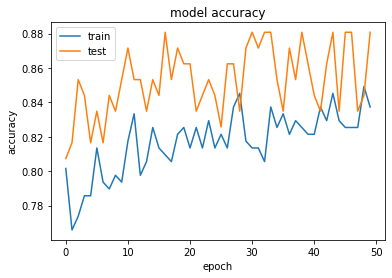

In [103]:
plt.plot(training.history['accuracy'])
plt.plot(test.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()